Suggestions for lab exercises.

# Basic functions

## Exercise 1

Write a function to calculate the volume of a cuboid with edge lengths $a, b, c$. Test your code on sample values such as

1. $a=1, b=1, c=1$ (result should be $1$);
2. $a=1, b=2, c=3.5$ (result should be $7.0$);
3. $a=0, b=1, c=1$ (result should be $0$);
4. $a=2, b=-1, c=1$ (what do you think the result should be?).

#### Solution

In [1]:
def cuboid_volume(a, b, c):
    """
    Compute the volume of a cuboid with edge lengths a, b, c.
    Volume is abc. Only makes sense if all are non-negative.
    
    Parameters
    ----------
    
    a : float
        Edge length 1
    b : float
        Edge length 2
    c : float
        Edge length 3
        
    Returns
    -------
    
    volume : float
        The volume a*b*c
    """
    
    if (a < 0.0) or (b < 0.0) or (c < 0.0):
        print("Negative edge length makes no sense!")
        return 0
    
    return a*b*c

In [2]:
print(cuboid_volume(1,1,1))
print(cuboid_volume(1,2,3.5))
print(cuboid_volume(0,1,1))
print(cuboid_volume(2,-1,1))

1
7.0
0
Negative edge length makes no sense!
0


In later cases, after having covered exceptions, I would suggest raising a `NotImplementedError` for negative edge lengths.

## Exercise 2

Write a function to compute the time (in seconds) taken for an object to fall from a height $H$ (in metres) to the ground, using the formula
\begin{equation}
  h(t) = \frac{1}{2} g t^2.
\end{equation}
Use the value of the acceleration due to gravity $g$ from `scipy.constants.g`. Test your code on sample values such as

1. $H = 1$m (result should be $\approx 0.452$s);
2. $H = 10$m (result should be $\approx 1.428$s);
3. $H = 0$m (result should be $0$s);
4. $H = -1$m (what do you think the result should be?).

#### Solution

In [3]:
def fall_time(H):
    """
    Give the time in seconds for an object to fall to the ground
    from H metres.
    
    Parameters
    ----------
    
    H : float
        Starting height (metres)
        
    Returns
    -------
    
    T : float
        Fall time (seconds)
    """
    
    from math import sqrt
    from scipy.constants import g
    
    if (H < 0):
        print("Negative height makes no sense!")
        return 0
    
    return sqrt(2.0*H/g)

In [4]:
print(fall_time(1))
print(fall_time(10))
print(fall_time(0))
print(fall_time(-1))

0.451600755752
1.42808698123
0.0
Negative height makes no sense!
0


## Exercise 3

Write a function that computes the area of a triangle with edge lengths $a, b, c$. You may use the formula
\begin{equation}
  A = \sqrt{s (s - a) (s - b) (s - c)}, \qquad s = \frac{a + b + c}{2}.
\end{equation}

Construct your own test cases to cover a range of possibilities.

In [5]:
def triangle_area(a, b, c):
    """
    Compute the area of a triangle with edge lengths a, b, c.
    Area is sqrt(s (s-a) (s-b) (s-c)). 
    s is (a+b+c)/2.
    Only makes sense if all are non-negative.
    
    Parameters
    ----------
    
    a : float
        Edge length 1
    b : float
        Edge length 2
    c : float
        Edge length 3
        
    Returns
    -------
    
    area : float
        The triangle area.
    """
    
    from math import sqrt
    
    if (a < 0.0) or (b < 0.0) or (c < 0.0):
        print("Negative edge length makes no sense!")
        return 0
    
    s = 0.5 * (a + b + c)
    return sqrt(s * (s-a) * (s-b) * (s-c))

In [6]:
print(triangle_area(1,1,1)) # Equilateral; answer sqrt(3)/4 ~ 0.433
print(triangle_area(3,4,5)) # Right triangle; answer 6
print(triangle_area(1,1,0)) # Not a triangle; answer 0
print(triangle_area(-1,1,1)) # Not a triangle; exception or 0.

0.433012701892
6.0
0.0
Negative edge length makes no sense!
0


# Floating point numbers

## Exercise 1

Computers cannot, in principle, represent real numbers perfectly. This can lead to problems of accuracy. For example, if

\begin{equation}
  x = 1, \qquad y = 1 + 10^{-14} \sqrt{3}
\end{equation}

then it *should* be true that

\begin{equation}
  10^{14} (y - x) = \sqrt{3}.
\end{equation}

Check how accurately this equation holds in Python and see what this implies about the accuracy of subtracting two numbers that are close together.

#### Solution

In [7]:
from math import sqrt

x = 1.0
y = 1.0 + 1e-14 * sqrt(3.0)
print("The calculation gives {}".format(1e14*(y-x)))
print("The result should be {}".format(sqrt(3.0)))

The calculation gives 1.73194791842
The result should be 1.73205080757


We see that the first three digits are correct. This isn't too surprising: we expect 16 digits of accuracy for a floating point number, but $x$ and $y$ are identical for the first 14 digits.

## Exercise 2

The standard quadratic formula gives the solutions to

\begin{equation}
  a x^2 + b x + c = 0
\end{equation}

as

\begin{equation}
  x = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2 a}.
\end{equation}

Show that, if $a = 10^{-n} = c$ and $b = 10^n$ then

\begin{equation}
  x = \frac{10^{2 n}}{2} \left( -1 \pm \sqrt{1 - 10^{-4n}} \right).
\end{equation}

Using the expansion (from Taylor's theorem)

\begin{equation}
  \sqrt{1 - 10^{-4 n}} \simeq 1 - \frac{10^{-4 n}}{2} + \dots, \qquad n \gg 1,
\end{equation}

show that

\begin{equation}
  x \simeq -10^{2 n} + \frac{10^{-2 n}}{4} \quad \text{and} \quad -\frac{10^{-2n}}{4}, \qquad n \gg 1.
\end{equation}

#### Solution

This is pen-and-paper work; each step should be re-arranging.

## Exercise 3

By multiplying and dividing by $-b \mp \sqrt{b^2 - 4 a c}$, check that we can also write the solutions to the quadratic equation as

\begin{equation}
  x = \frac{2 c}{-b \mp \sqrt{b^2 - 4 a c}}.
\end{equation}

#### Solution

Using the difference of two squares we get

\begin{equation}
  x = \frac{b^2 - \left( b^2 - 4 a c \right)}{2a \left( -b \mp \sqrt{b^2 - 4 a c} \right)}
\end{equation}

which re-arranges to give the required solution.

## Exercise 4

Using Python, calculate both solutions to the quadratic equation

\begin{equation}
  10^{-n} x^2 + 10^n x + 10^{-n} = 0
\end{equation}

for $n = 3$ and $n = 4$ using both formulas. What do you see? How has floating point accuracy caused problems here?

#### Solution

In [8]:
a = 1e-3
b = 1e3
c = a
formula1_n3_plus = (-b + sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula1_n3_minus = (-b - sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula2_n3_plus = (2.0*c)/(-b + sqrt(b**2 - 4.0*a*c))
formula2_n3_minus = (2.0*c)/(-b - sqrt(b**2 - 4.0*a*c))
print("For n=3, first formula, solutions are {} and {}.".format(formula1_n3_plus, 
                                                                formula1_n3_minus))
print("For n=3, second formula, solutions are {} and {}.".format(formula2_n3_plus, 
                                                                 formula2_n3_minus))

a = 1e-4
b = 1e4
c = a
formula1_n4_plus = (-b + sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula1_n4_minus = (-b - sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula2_n4_plus = (2.0*c)/(-b + sqrt(b**2 - 4.0*a*c))
formula2_n4_minus = (2.0*c)/(-b - sqrt(b**2 - 4.0*a*c))
print("For n=4, first formula, solutions are {} and {}.".format(formula1_n4_plus, 
                                                                formula1_n4_minus))
print("For n=4, second formula, solutions are {} and {}.".format(formula2_n4_plus, 
                                                                 formula2_n4_minus))

For n=3, first formula, solutions are -9.99989424599e-07 and -999999.999999.
For n=3, second formula, solutions are -1000010.57551 and -1e-06.
For n=4, first formula, solutions are -9.09494701773e-09 and -100000000.0.
For n=4, second formula, solutions are -109951162.778 and -1e-08.


There is a difference in the fifth significant figure in both solutions in the first case, which gets to the third (arguably the second) significant figure in the second case. Comparing to the limiting solutions above, we see that the *larger* root is definitely more accurately captured with the first formula than the second (as the result should be bigger than $10^{-2n}$).

In the second case we have divided by a very small number to get the big number, which loses accuracy.

## Exercise 5

The standard definition of the derivative of a function is

\begin{equation}
  \left. \frac{\text{d} f}{\text{d} x} \right|_{x=X} = \lim_{\delta \to 0} \frac{f(X + \delta) - f(X)}{\delta}.
\end{equation}

We can *approximate* this by computing the result for a *finite* value of $\delta$:

\begin{equation}
  g(x, \delta) = \frac{f(x + \delta) - f(x)}{\delta}.
\end{equation}

Write a function that takes as inputs a function of one variable, $f(x)$, a location $X$, and a step length $\delta$, and returns the approximation to the derivative given by $g$.

#### Solution

In [9]:
def g(f, X, delta):
    """
    Approximate the derivative of a given function at a point.
    
    Parameters
    ----------
    
    f : function
        Function to be differentiated
    X : real
        Point at which the derivative is evaluated
    delta : real
        Step length
        
    Returns
    -------
    
    g : real
        Approximation to the derivative
    """
    
    return (f(X+delta) - f(X)) / delta

## Exercise 6

The function $f_1(x) = e^x$ has derivative with the exact value $1$ at $x=0$. Compute the approximate derivative using your function above, for $\delta = 10^{-2 n}$ with $n = 1, \dots, 7$. You should see the results initially improve, then get worse. Why is this?

#### Solution

In [10]:
from math import exp
for n in range(1, 8):
    print("For n={}, the approx derivative is {}.".format(n, g(exp, 0.0, 10**(-2.0*n))))

For n=1, the approx derivative is 1.00501670842.
For n=2, the approx derivative is 1.00005000167.
For n=3, the approx derivative is 1.00000049996.
For n=4, the approx derivative is 0.999999993923.
For n=5, the approx derivative is 1.00000008274.
For n=6, the approx derivative is 1.00008890058.
For n=7, the approx derivative is 0.999200722163.


We have a combination of floating point inaccuracies: in the numerator we have two terms that are nearly equal, leading to a very small number. We then divide two very small numbers. This is inherently inaccurate.

This does not mean that you can't calculate derivatives to high accuracy, but alternative approaches are definitely recommended.

# Prime numbers

## Exercise 1

Write a function that tests if a number is prime. Test it by writing out all prime numbers less than 50.

#### Solution

This is a "simple" solution, but not efficient.

In [11]:
def isprime(n):
    """
    Checks to see if an integer is prime.
    
    Parameters
    ----------
    
    n : integer
        Number to check
        
    Returns
    -------
    
    isprime : Boolean
        If n is prime
    """
    
    # No number less than 2 can be prime
    if n < 2:
        return False
    
    # We only need to check for divisors up to sqrt(n)
    for m in range(2, int(n**0.5)+1):
        if n%m == 0:
            return False
    
    # If we've got this far, there are no divisors.
    return True

In [12]:
for n in range(50):
    if isprime(n):
        print("Function says that {} is prime.".format(n))

Function says that 2 is prime.
Function says that 3 is prime.
Function says that 5 is prime.
Function says that 7 is prime.
Function says that 11 is prime.
Function says that 13 is prime.
Function says that 17 is prime.
Function says that 19 is prime.
Function says that 23 is prime.
Function says that 29 is prime.
Function says that 31 is prime.
Function says that 37 is prime.
Function says that 41 is prime.
Function says that 43 is prime.
Function says that 47 is prime.


## Exercise 2

500 years ago some believed that the number $2^n - 1$ was prime for *all* primes $n$. Use your function to find the first prime $n$ for which this is not true.

#### Solution

We could do this many ways. This "elegant" solution says:

* Start from the smallest possible $n$ (2).
* Check if $n$ is prime. If not, add one to $n$.
* If $n$ is prime, check if $2^n-1$ is prime. If it is, add one to $n$.
* If both those logical checks fail, we have found the $n$ we want.

In [13]:
n = 2
while (not isprime(n)) or (isprime(2**n-1)):
    n += 1
print("The first n such that 2^n-1 is not prime is {}.".format(n))

The first n such that 2^n-1 is not prime is 11.


## Exercise 3

The *Mersenne* primes are those that have the form $2^n-1$, where $n$ is prime. Use your previous solutions to generate all the $n < 40$ that give Mersenne primes.

#### Solution

In [14]:
for n in range(2, 41):
    if isprime(n) and isprime(2**n-1):
        print("n={} is such that 2^n-1 is prime.".format(n))

n=2 is such that 2^n-1 is prime.
n=3 is such that 2^n-1 is prime.
n=5 is such that 2^n-1 is prime.
n=7 is such that 2^n-1 is prime.
n=13 is such that 2^n-1 is prime.
n=17 is such that 2^n-1 is prime.
n=19 is such that 2^n-1 is prime.
n=31 is such that 2^n-1 is prime.


## Exercise 4

Write a function to compute all prime factors of an integer $n$, including their multiplicities. Test it by printing the prime factors (without multiplicities) of $n = 17, \dots, 20$ and the multiplicities (without factors) of $n = 48$.

##### Note 

One effective solution is to return a *dictionary*, where the keys are the factors and the values are the multiplicities.

#### Solution

This solution uses the trick of immediately dividing $n$ by any divisor: this means we never have to check the divisor for being prime.

In [15]:
def prime_factors(n):
    """
    Generate all the prime factors of n.
    
    Parameters
    ----------
    
    n : integer
        Number to be checked
        
    Returns
    -------
    
    factors : dict
        Prime factors (keys) and multiplicities (values)
    """
    
    factors = {}
    
    m = 2
    while m <= n:
        if n%m == 0:
            factors[m] = 1
            n //= m
            while n%m == 0:
                factors[m] += 1
                n //= m
        m += 1
        
    return factors

In [16]:
for n in range(17, 21):
    print("Prime factors of {} are {}.".format(n, prime_factors(n).keys()))
print("Multiplicities of prime factors of 48 are {}.".format(prime_factors(48).values()))

Prime factors of 17 are [17].
Prime factors of 18 are [2, 3].
Prime factors of 19 are [19].
Prime factors of 20 are [2, 5].
Multiplicities of prime factors of 48 are [4, 1].


## Exercise 5

Write a function to generate all the integer divisors, including 1, but not including $n$ itself, of an integer $n$. Test it on $n = 16, \dots, 20$.

##### Note

You could use the prime factorization from the previous exercise, or you could do it directly.

#### Solution

Here we will do it directly.

In [17]:
def divisors(n):
    """
    Generate all integer divisors of n.
    
    Parameters
    ----------
    
    n : integer
        Number to be checked
        
    Returns
    -------
    
    divs : list
        All integer divisors, including 1.
    """
    
    divs = [1]
    m = 2
    while m <= n/2:
        if n%m == 0:
            divs.append(m)
        m += 1
        
    return divs

In [18]:
for n in range(16, 21):
    print("The divisors of {} are {}.".format(n, divisors(n)))

The divisors of 16 are [1, 2, 4, 8].
The divisors of 17 are [1].
The divisors of 18 are [1, 2, 3, 6, 9].
The divisors of 19 are [1].
The divisors of 20 are [1, 2, 4, 5, 10].


## Exercise 6

A *perfect* number $n$ is one where the divisors sum to $n$. For example, 6 has divisors 1, 2, and 3, which sum to 6. Use your previous solution to find all perfect numbers $n < 10,000$ (there are only four!).

#### Solution

We can do this much more efficiently than the code below using packages such as `numpy`, but this is a "bare python" solution.

In [19]:
def isperfect(n):
    """
    Check if a number is perfect.
    
    Parameters
    ----------
    
    n : integer
        Number to check
        
    Returns
    -------
    
    isperfect : Boolean
        Whether it is perfect or not.
    """
    
    divs = divisors(n)
    sum_divs = 0
    for d in divs:
        sum_divs += d
    
    return n == sum_divs

In [20]:
for n in range(2,10000):
    if (isperfect(n)):
        factors = prime_factors(n)
        print("{} is perfect.\n"
              "Divisors are {}.\n"
              "Prime factors {} (multiplicities {}).".format(
            n, divisors(n), factors.keys(), factors.values()))

6 is perfect.
Divisors are [1, 2, 3].
Prime factors [2, 3] (multiplicities [1, 1]).
28 is perfect.
Divisors are [1, 2, 4, 7, 14].
Prime factors [2, 7] (multiplicities [2, 1]).
496 is perfect.
Divisors are [1, 2, 4, 8, 16, 31, 62, 124, 248].
Prime factors [2, 31] (multiplicities [4, 1]).
8128 is perfect.
Divisors are [1, 2, 4, 8, 16, 32, 64, 127, 254, 508, 1016, 2032, 4064].
Prime factors [2, 127] (multiplicities [6, 1]).


## Exercise 7

Using your previous functions, check that all perfect numbers $n < 10,000$ can be written as $2^{k-1} \times (2^k - 1)$, where $2^k-1$ is a Mersenne prime.

#### Solution

In fact we did this above already:

* $6 = 2^{2-1} \times (2^2 - 1)$. 2 is the first number on our Mersenne list.
* $28 = 2^{3-1} \times (2^3 - 1)$. 3 is the second number on our Mersenne list.
* $496 = 2^{5-1} \times (2^5 - 1)$. 5 is the third number on our Mersenne list.
* $8128 = 2^{7-1} \times (2^7 - 1)$. 7 is the fourth number on our Mersenne list.

## Exercise 8 (bonus)

Investigate the `timeit` function in python or IPython. Use this to measure how long your function takes to check that, if $k$ on the Mersenne list then $n = 2^{k-1} \times (2^k - 1)$ is a perfect number, using your functions. Stop increasing $k$ when the time takes too long!

##### Note

You could waste considerable time on this, and on optimizing the functions above to work efficiently. It is *not* worth it, other than to show how rapidly the computation time can grow!

#### Solution

In [21]:
%timeit isperfect(2**(3-1)*(2**3-1))

The slowest run took 4.42 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.61 µs per loop


In [22]:
%timeit isperfect(2**(5-1)*(2**5-1))

10000 loops, best of 3: 40.2 µs per loop


In [23]:
%timeit isperfect(2**(7-1)*(2**7-1))

1000 loops, best of 3: 705 µs per loop


In [24]:
%timeit isperfect(2**(13-1)*(2**13-1))

1 loops, best of 3: 3.01 s per loop


It's worth thinking about the operation counts of the various functions implemented here. The implementations are inefficient, but even in the best case you see how the number of operations (and hence computing time required) rapidly increases.

# Logistic map

Partly taken from Newman's book, p 120.

The logistic map builds a sequence of numbers $\{ x_n \}$ using the relation

\begin{equation}
  x_{n+1} = r x_n \left( 1 - x_n \right),
\end{equation}

where $0 \le x_0 \le 1$.

## Exercise 1

Write a program that calculates the first $N$ members of the sequence, given as input $x_0$ and $r$ (and, of course, $N$).

#### Solution

In [25]:
def logistic(x0, r, N = 1000):
    sequence = [x0]
    xn = x0
    for n in range(N):
        xnew = r*xn*(1.0-xn)
        sequence.append(xnew)
        xn = xnew
    return sequence

## Exercise 2

Fix $x_0=0.5$. Calculate the first 2,000 members of the sequence for $r=1.5$ and $r=3.5$ Plot the last 100 members of the sequence in both cases.

What does this suggest about the long-term behaviour of the sequence?

#### Solution

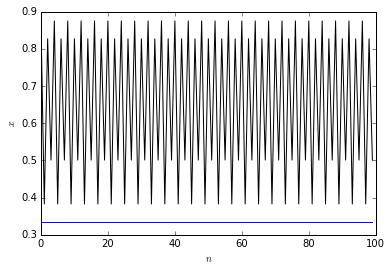

In [26]:
import numpy
from matplotlib import pyplot
%matplotlib inline

x0 = 0.5
N = 2000
sequence1 = logistic(x0, 1.5, N)
sequence2 = logistic(x0, 3.5, N)
pyplot.plot(sequence1[-100:], 'b-', label = r'$r=1.5$')
pyplot.plot(sequence2[-100:], 'k-', label = r'$r=3.5$')
pyplot.xlabel(r'$n$')
pyplot.ylabel(r'$x$')
pyplot.show()

This suggests that, for $r=1.5$, the sequence has settled down to a fixed point. In the $r=3.5$ case it seems to be moving between four points repeatedly.

## Exercise 3

Fix $x_0 = 0.5$. For each value of $r$ between $1$ and $4$, in steps of $0.01$, calculate the first 2,000 members of the sequence. Plot the last 1,000 members of the sequence on a plot where the $x$-axis is the value of $r$ and the $y$-axis is the values in the sequence. Do not plot lines - just plot markers (e.g., use the `'k.'` plotting style).

#### Solution

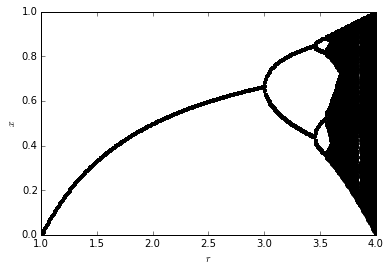

In [27]:
import numpy
from matplotlib import pyplot
%matplotlib inline

r_values = numpy.linspace(1.0, 4.0, 401)
x0 = 0.5
N = 2000
for r in r_values:
    sequence = logistic(x0, r, N)
    pyplot.plot(r*numpy.ones_like(sequence[1000:]), sequence[1000:], 'k.')
pyplot.xlabel(r'$r$')
pyplot.ylabel(r'$x$')
pyplot.show()

## Exercise 4

For iterative maps such as the logistic map, one of three things can occur:

1. The sequence settles down to a *fixed point*.
2. The sequence rotates through a finite number of values. This is called a *limit cycle*.
3. The sequence generates an infinite number of values. This is called *deterministic chaos*.

Using just your plot, or new plots from this data, work out approximate values of $r$ for which there is a transition from fixed points to limit cycles, from limit cycles of a given number of values to more values, and the transition to chaos.

#### Solution

The first transition is at $r \approx 3$, the next at $r \approx 3.45$, the next at $r \approx 3.55$. The transition to chaos appears to happen before $r=4$, but it's not obvious exactly where.

# Mandelbrot

The Mandelbrot set is also generated from a sequence, $\{ z_n \}$, using the relation

\begin{equation}
  z_{n+1} = z_n^2 + c, \qquad z_0 = 0.
\end{equation}

The members of the sequence, and the constant $c$, are all complex. The point in the complex plane at $c$ is in the Mandelbrot set only if the $|z_n| < 2$ for all members of the sequence. In reality, checking the first 100 iterations is sufficient.

Note: the python notation for a complex number $x + \text{i} y$ is `x + yj`: that is, `j` is used to indicate $\sqrt{-1}$. If you know the values of `x` and `y` then `x + yj` constructs a complex number; if they are stored in variables you can use `complex(x, y)`.

## Exercise 1

Write a function that checks if the point $c$ is in the Mandelbrot set.

#### Solution

In [28]:
def in_Mandelbrot(c, n_iterations = 100):
    z0 = 0.0 + 0j
    in_set = True
    n = 0
    zn = z0
    while in_set and (n < n_iterations):
        n += 1
        znew = zn**2 + c
        in_set = abs(znew) < 2.0
        zn = znew
    return in_set

## Exercise 2

Check the points $c=0$ and $c=\pm 2 \pm 2 \text{i}$ and ensure they do what you expect. (What *should* you expect?)

#### Solution

In [29]:
c_values = [0.0, 2+2j, 2-2j, -2+2j, -2-2j]
for c in c_values:
    print("Is {} in the Mandelbrot set? {}.".format(c, in_Mandelbrot(c)))

Is 0.0 in the Mandelbrot set? True.
Is (2+2j) in the Mandelbrot set? False.
Is (2-2j) in the Mandelbrot set? False.
Is (-2+2j) in the Mandelbrot set? False.
Is (-2-2j) in the Mandelbrot set? False.


## Exercise 3

Write a function that, given $N$

1. generates an $N \times N$ grid spanning $c = x + \text{i} y$, for $-2 \le x \le 2$ and $-2 \le y \le 2$;
2. returns an $N\times N$ array containing one if the associated grid point is in the Mandelbrot set, and zero otherwise.

#### Solution

In [30]:
import numpy

def grid_Mandelbrot(N):
    x = numpy.linspace(-2.0, 2.0, N)
    X, Y = numpy.meshgrid(x, x)
    C = X + 1j*Y
    grid = numpy.zeros((N, N), int)
    for nx in range(N):
        for ny in range(N):
            grid[nx, ny] = int(in_Mandelbrot(C[nx, ny]))
    return grid

## Exercise 4

Using the function `imshow` from `matplotlib`, plot the resulting array for a $100 \times 100$ array to make sure you see the expected shape.

#### Solution

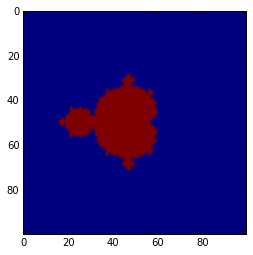

In [31]:
from matplotlib import pyplot
%matplotlib inline

pyplot.imshow(grid_Mandelbrot(100))

## Exercise 5

Modify your functions so that, instead of returning whether a point is inside the set or not, it returns the logarithm of the number of iterations it takes. Plot the result using `imshow` again.

#### Solution

In [32]:
from math import log

def log_Mandelbrot(c, n_iterations = 100):
    z0 = 0.0 + 0j
    in_set = True
    n = 0
    zn = z0
    while in_set and (n < n_iterations):
        n += 1
        znew = zn**2 + c
        in_set = abs(znew) < 2.0
        zn = znew
    return log(n)

def log_grid_Mandelbrot(N):
    x = numpy.linspace(-2.0, 2.0, N)
    X, Y = numpy.meshgrid(x, x)
    C = X + 1j*Y
    grid = numpy.zeros((N, N), int)
    for nx in range(N):
        for ny in range(N):
            grid[nx, ny] = log_Mandelbrot(C[nx, ny])
    return grid

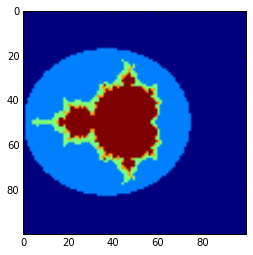

In [33]:
from matplotlib import pyplot
%matplotlib inline

pyplot.imshow(log_grid_Mandelbrot(100))

## Exercise 6

Try some higher resolution plots, and try plotting only a section to see the structure. **Note** this is not a good way to get high accuracy close up images!

#### Solution

This is a simple example:

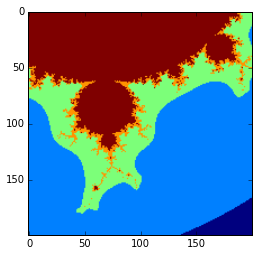

In [34]:
pyplot.imshow(log_grid_Mandelbrot(1000)[600:800,400:600])

# Equivalence classes

An *equivalence class* is a relation that groups objects in a set into related subsets. For example, if we think of the integers modulo $7$, then $1$ is in the same equivalence class as $8$ (and $15$, and $22$, and so on), and $3$ is in the same equivalence class as $10$. We use the tilde $3 \sim 10$ to denote two objects within the same equivalence class.

Here, we are going to define the positive integers programmatically from equivalent sequences.

## Exercise 1

Define a python class `Eqint`. This should be

1. Initialized by a sequence;
2. Store the sequence;
3. Define its representation (via the `__repr__` function) to be the integer length of the sequence;
4. Redefine equality (via the `__eq__` function) so that two `eqint`s are equal if their sequences have same length.

#### Solution

In [35]:
class Eqint(object):
    
    def __init__(self, sequence):
        self.sequence = sequence
        
    def __repr__(self):
        return str(len(self.sequence))
    
    def __eq__(self, other):
        return len(self.sequence)==len(other.sequence)

## Exercise 2

Define a `zero` object from the empty list, and three `one` objects, from a single object list, tuple, and string. For example

```python
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')
```

Check that none of the `one` objects equal the zero object, but all equal the other `one` objects. Print each object to check that the representation gives the integer length.

#### Solution

In [36]:
zero = Eqint([])
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')

print("Is zero equivalent to one? {}, {}, {}".format(zero == one_list, 
                                                     zero == one_tuple,
                                                     zero == one_string))
print("Is one equivalent to one? {}, {}, {}.".format(one_list == one_tuple,
                                                     one_list == one_string,
                                                     one_tuple == one_string))
print(zero)
print(one_list)
print(one_tuple)
print(one_string)

Is zero equivalent to one? False, False, False
Is one equivalent to one? True, True, True.
0
1
1
1


## Exercise 3

Redefine the class by including an `__add__` method that combines the two sequences. That is, if `a` and `b` are `Eqint`s then `a+b` should return an `Eqint` defined from combining `a` and `b`s sequences.

##### Note

Adding two different *types* of sequences (eg, a list to a tuple) does not work, so it is better to either iterate over the sequences, or to convert to a uniform type before adding.

#### Solution

In [37]:
class Eqint(object):
    
    def __init__(self, sequence):
        self.sequence = sequence
        
    def __repr__(self):
        return str(len(self.sequence))
    
    def __eq__(self, other):
        return len(self.sequence)==len(other.sequence)
    
    def __add__(a, b):
        return Eqint(tuple(a.sequence) + tuple(b.sequence))

## Exercise 4

Check your addition function by adding together all your previous `Eqint` objects (which will need re-defining, as the class has been redefined). Print the resulting object to check you get `3`, and also print its internal sequence.

#### Solution

In [38]:
zero = Eqint([])
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')

sum_eqint = zero + one_list + one_tuple + one_string
print("The sum is {}.".format(sum_eqint))
print("The internal sequence is {}.".format(sum_eqint.sequence))

The sum is 3.
The internal sequence is (1, 1, '1').


## Exercise 5

We will sketch a construction of the positive integers from *nothing*.

1. Define an empty list `positive_integers`.
2. Define an `Eqint` called `zero` from the empty list. Append it to `positive_integers`.
3. Define an `Eqint` called `next_integer` from the `Eqint` defined by *a copy of* `positive_integers` (ie, use `Eqint(list(positive_integers))`. Append it to `positive_integers`.
4. Repeat step 3 as often as needed.

Use this procedure to define the `Eqint` equivalent to $10$. Print it, and its internal sequence, to check.

#### Solution

In [39]:
positive_integers = []
zero = Eqint([])
positive_integers.append(zero)

N = 10
for n in range(1,N+1):
    positive_integers.append(Eqint(list(positive_integers)))
    
print("The 'final' Eqint is {}".format(positive_integers[-1]))
print("Its sequence is {}".format(positive_integers[-1].sequence))
print("That is, it contains all Eqints with length less than 10.")

The 'final' Eqint is 10
Its sequence is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
That is, it contains all Eqints with length less than 10.


# The shortest published Mathematical paper

A [candidate for the shortest mathematical paper ever](http://www.ams.org/journals/bull/1966-72-06/S0002-9904-1966-11654-3/S0002-9904-1966-11654-3.pdf) shows the following result:

\begin{equation}
  27^5 + 84^5 + 110^5 + 133^5 = 144^5.
\end{equation}

This is interesting as

> This is a counterexample to a conjecture by Euler ... that at least $n$ $n$th powers are required to sum to an $n$th power, $n > 2$.

## Exercise 1

Using python, check the equation above is true.

#### Solution

In [40]:
lhs = 27**5 + 84**5 + 110**5 + 133**5
rhs = 144**5

print("Does the LHS {} equal the RHS {}? {}".format(lhs, rhs, lhs==rhs))

Does the LHS 61917364224 equal the RHS 61917364224? True


## Exercise 2

The more interesting statement in the paper is that

\begin{equation}
  27^5 + 84^5 + 110^5 + 133^5 = 144^5.
\end{equation}

> [is] the smallest instance in which four fifth powers sum to a fifth power.

Interpreting "the smallest instance" to mean the solution where the right hand side term (the largest integer) is the smallest, we want to use python to check this statement.

You may find the `combinations` function from the `itertools` package useful.

In [41]:
import numpy
import itertools

The `combinations` function returns all the combinations (ignoring order) of `r` elements from a given list. For example, take a list of length 6, `[1, 2, 3, 4, 5, 6]` and compute all the combinations of length 4:

In [42]:
input_list = numpy.arange(1, 7)
combinations = list(itertools.combinations(input_list, 4))
print(combinations)

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 5, 6), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 5, 6), (1, 4, 5, 6), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 5, 6), (2, 4, 5, 6), (3, 4, 5, 6)]


We can already see that the number of terms to consider is large.

Note that we have used the `list` function to explicitly get a list of the combinations. The `combinations` function returns a *generator*, which can be used in a loop as if it were a list, without storing all elements of the list.

How fast does the number of combinations grow? The standard formula says that for a list of length $n$ there are

\begin{equation}
  \begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k! (n-k)!}
\end{equation}

combinations of length $k$. For $k=4$ as needed here we will have $n (n-1) (n-2) (n-3) / 24$ combinations. For $n=144$ we therefore have

In [43]:
n_combinations = 144*143*142*141/24
print("Number of combinations of 4 objects from 144 is {}".format(n_combinations))

Number of combinations of 4 objects from 144 is 17178876


### Exercise 2a

Show, by getting python to compute the number of combinations $N = \begin{pmatrix} n \\ 4 \end{pmatrix}$ that $N$ grows roughly as $n^4$. To do this, plot the number of combinations and $n^4$ on a log-log scale. Restrict to $n \le 50$.

#### Solution

In [44]:
from matplotlib import pyplot
%matplotlib inline

In [45]:
n = numpy.arange(5, 51)
N = numpy.zeros_like(n)
for i, n_c in enumerate(n):
    combinations = list(itertools.combinations(numpy.arange(1,n_c+1), 4))
    N[i] = len(combinations)

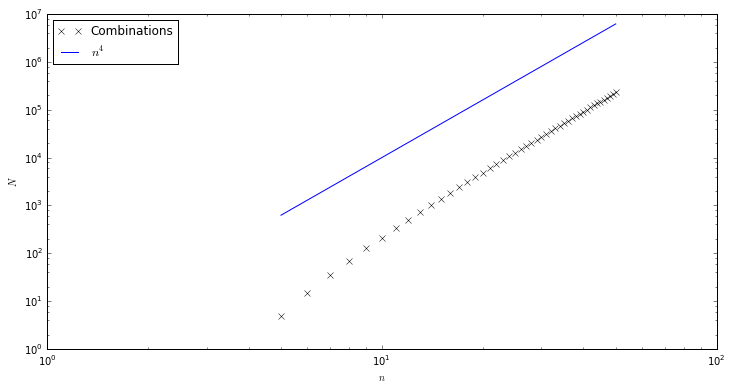

In [46]:
pyplot.figure(figsize=(12,6))
pyplot.loglog(n, N, linestyle='None', marker='x', color='k', label='Combinations')
pyplot.loglog(n, n**4, color='b', label=r'$n^4$')
pyplot.xlabel(r'$n$')
pyplot.ylabel(r'$N$')
pyplot.legend(loc='upper left')
pyplot.show()

With 17 million combinations to work with, we'll need to be a little careful how we compute.

One thing we could try is to loop through each possible "smallest instance" (the term on the right hand side) in increasing order. We then check all possible combinations of left hand sides.

This is computationally *very expensive* as we repeat a lot of calculations. We repeatedly recalculate combinations (a bad idea). We repeatedly recalculate the powers of the same number.

Instead, let us try creating the list of all combinations of powers once.

### Exercise 2b

1. Construct a `numpy` array containing all integers in $1, \dots, 144$ to the fifth power. 
2. Construct a list of all combinations of four elements from this array.
3. Construct a list of sums of all these combinations.
4. Loop over one list and check if the entry appears in the other list (ie, use the `in` keyword).

#### Solution

In [47]:
nmax=145
range_to_power = numpy.arange(1, nmax)**5
lhs_combinations = list(itertools.combinations(range_to_power, 4))

Then calculate the sums:

In [48]:
lhs_sums = []
for lhs_terms in lhs_combinations:
    lhs_sums.append(numpy.sum(numpy.array(lhs_terms)))

Finally, loop through the sums and check to see if it matches any possible term on the RHS:

In [49]:
for i, lhs in enumerate(lhs_sums):
    if lhs in range_to_power:
        rhs_primitive = int(lhs**(0.2))
        lhs_primitive = (numpy.array(lhs_combinations[i])**(0.2)).astype(int)
        print("The LHS terms are {}.".format(lhs_primitive))
        print("The RHS term is {}.".format(rhs_primitive))

The LHS terms are [ 27  84 110 133].
The RHS term is 144.


# Lorenz attractor

The Lorenz system is a set of ordinary differential equations which can be written

\begin{equation}
  \frac{\text{d} \vec{v}}{\text{d} \vec{t}} = \vec{f}(\vec{v})
\end{equation}

where the variables in the state vector $\vec{v}$ are

\begin{equation}
  \vec{v} = \begin{pmatrix} x(t) \\ y(t) \\ z(t) \end{pmatrix}
\end{equation}

and the function defining the ODE is

\begin{equation}
  \vec{f} = \begin{pmatrix} \sigma \left( y(t) - x(t) \right) \\ x(t) \left( \rho - z(t) \right) - y(t) \\ x(t) y(t) - \beta z(t) \end{pmatrix}.
\end{equation}

The parameters $\sigma, \rho, \beta$ are all real numbers.

## Exercise 1

Write a function `dvdt(v, t, params)` that returns $\vec{f}$ given $\vec{v}, t$ and the parameters $\sigma, \rho, \beta$.

#### Solution

In [50]:
def dvdt(v, t, sigma, rho, beta):
    """
    Define the Lorenz system.
    
    Parameters
    ----------
    
    v : list
        State vector
    t : float
        Time
    sigma : float
        Parameter
    rho : float
        Parameter
    beta : float
        Parameter
    
    Returns
    -------
    
    dvdt : list
        RHS defining the Lorenz system
    """
    
    x, y, z = v
    
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

## Exercise 2

Fix $\sigma=10, \beta=8/3$. Set initial data to be $\vec{v}(0) = \vec{1}$. Using `scipy`, specifically the `odeint` function of `scipy.integrate`, solve the Lorenz system up to $t=100$ for $\rho=13, 14, 15$ and $28$.

Plot your results in 3d, plotting $x, y, z$.

#### Solution

In [51]:
import numpy
from scipy.integrate import odeint

In [52]:
v0 = [1.0, 1.0, 1.0]
sigma = 10.0
beta = 8.0/3.0
t_values = numpy.linspace(0.0, 100.0, 5000)
rho_values = [13.0, 14.0, 15.0, 28.0]
v_values = []
for rho in rho_values:
    params = (sigma, rho, beta)
    v = odeint(dvdt, v0, t_values, args=params)
    v_values.append(v)

In [53]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D

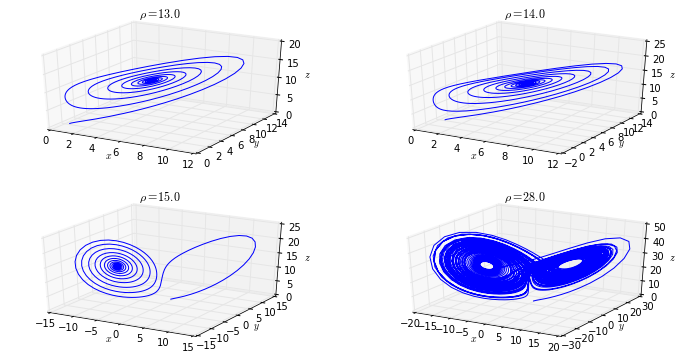

In [54]:
fig = pyplot.figure(figsize=(12,6))
for i, v in enumerate(v_values):
    ax = fig.add_subplot(2,2,i+1,projection='3d')
    ax.plot(v[:,0], v[:,1], v[:,2])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    ax.set_title(r"$\rho={}$".format(rho_values[i]))
pyplot.show()

## Exercise 3

Fix $\rho = 28$. Solve the Lorenz system twice, up to $t=40$, using the two different initial conditions $\vec{v}(0) = \vec{1}$ and $\vec{v}(0) = \vec{1} + \vec{10^{-5}}$.

Show four plots. Each plot should show the two solutions on the same axes, plotting $x, y$ and $z$. Each plot should show $10$ units of time, ie the first shows $t \in [0, 10]$, the second shows $t \in [10, 20]$, and so on.

#### Solution

In [55]:
t_values = numpy.linspace(0.0, 40.0, 4000)
rho = 28.0
params = (sigma, rho, beta)
v_values = []
v0_values = [[1.0,1.0,1.0],
             [1.0+1e-5,1.0+1e-5,1.0+1e-5]]
for v0 in v0_values:
    v = odeint(dvdt, v0, t_values, args=params)
    v_values.append(v)

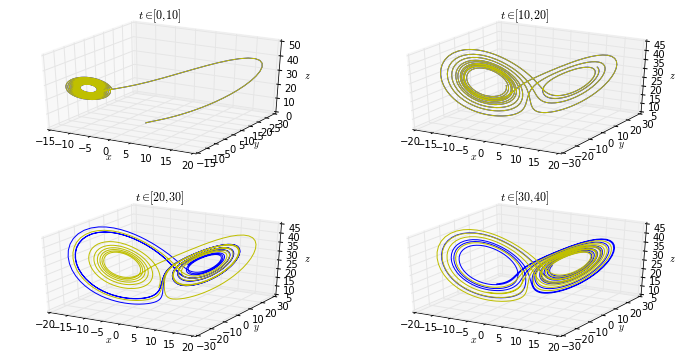

In [56]:
fig = pyplot.figure(figsize=(12,6))
line_colours = 'by'
for tstart in range(4):
    ax = fig.add_subplot(2,2,tstart+1,projection='3d')
    for i, v in enumerate(v_values):
        ax.plot(v[tstart*1000:(tstart+1)*1000,0], 
                v[tstart*1000:(tstart+1)*1000,1], 
                v[tstart*1000:(tstart+1)*1000,2], 
                color=line_colours[i])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    ax.set_title(r"$t \in [{},{}]$".format(tstart*10, (tstart+1)*10))
pyplot.show()

This shows the *sensitive dependence on initial conditions* that is characteristic of chaotic behaviour.